# COVID-19 Vaccine Adverse Reactions Analysis

### The objective here is to draw conclusions about the adverse effects of vaccine on the people of Los Angeles from a 3 raw datasets of United States.

In [1]:
# Necessary Imports:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading required datasets 
df_data = pd.read_csv('2021VAERSDATA.csv')
df_symp = pd.read_csv('2021VAERSSYMPTOMS.csv')
df_vax = pd.read_csv('2021VAERSVAX.csv')

c:\users\karan\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (7,12,23) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
print(df_data.head())

   VAERS_ID    RECVDATE STATE  AGE_YRS  CAGE_YR  CAGE_MO SEX RPT_DATE  \
0    916600  01/01/2021    TX     33.0     33.0      NaN   F      NaN   
1    916601  01/01/2021    CA     73.0     73.0      NaN   F      NaN   
2    916602  01/01/2021    WA     23.0     23.0      NaN   F      NaN   
3    916603  01/01/2021    WA     58.0     58.0      NaN   F      NaN   
4    916604  01/01/2021    TX     47.0     47.0      NaN   F      NaN   

                                        SYMPTOM_TEXT DIED  ...  \
0  Right side of epiglottis swelled up and hinder...  NaN  ...   
1  Approximately 30 min post vaccination administ...  NaN  ...   
2  About 15 minutes after receiving the vaccine, ...  NaN  ...   
3  extreme fatigue, dizziness,. could not lift my...  NaN  ...   
4  Injection site swelling, redness, warm to the ...  NaN  ...   

                                             CUR_ILL  \
0                                               None   
1  Patient residing at nursing facility. See pati...

In [4]:
df_symp.head()

,VAERS_ID,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5
0,916600,Dysphagia,23.1,Epiglottitis,23.1,NaN,NaN,NaN,NaN,NaN,NaN
1,916601,Anxiety,23.1,Dyspnoea,23.1,NaN,NaN,NaN,NaN,NaN,NaN
2,916602,Chest discomfort,23.1,Dysphagia,23.1,Pain in extremity,23.1,Visual impairment,23.1,NaN,NaN
3,916603,Dizziness,23.1,Fatigue,23.1,Mobility decreased,23.1,NaN,NaN,NaN,NaN
4,916604,Injection site erythema,23.1,Injection site pruritus,23.1,Injection site swelling,23.1,Injection site warmth,23.1,NaN,NaN


In [5]:
df_vax.head()

,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
0,916600,COVID19,MODERNA,037K20A,1,IM,LA,COVID19 (COVID19 (MODERNA))
1,916601,COVID19,MODERNA,025L20A,1,IM,RA,COVID19 (COVID19 (MODERNA))
2,916602,COVID19,PFIZER\BIONTECH,EL1284,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
3,916603,COVID19,MODERNA,unknown,UNK,NaN,NaN,COVID19 (COVID19 (MODERNA))
4,916604,COVID19,MODERNA,NaN,1,IM,LA,COVID19 (COVID19 (MODERNA))


In [6]:
# Deleting the unnecessary columns and Subsetting the DataFrame
del df_data['SYMPTOM_TEXT']
df_data = df_data[df_data.STATE == 'LA']

In [7]:
df_data.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,DIED,DATEDIED,...,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
20,916623,01/01/2021,LA,31.0,31.0,NaN,F,NaN,NaN,NaN,...,Bacterial Upper Respiratory infection(2 weeks ...,Anxiety,NaN,NaN,2,01/01/2021,NaN,NaN,NaN,Morphine
183,916803,01/01/2021,LA,78.0,78.0,NaN,M,NaN,Y,10/18/2020,...,none,"large T-cell lymphoma, HTN, Gout, recieving t...",NaN,NaN,2,01/01/2021,NaN,NaN,NaN,N?A
386,917026,01/01/2021,LA,82.0,82.0,NaN,M,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2,01/01/2021,NaN,NaN,NaN,Codeine Peanuts
423,917067,01/01/2021,LA,48.0,48.0,NaN,F,NaN,NaN,NaN,...,None,"HTN, gout",NaN,NaN,2,01/01/2021,NaN,NaN,NaN,"NKDA, NKFA"
456,917103,01/01/2021,LA,70.0,70.0,NaN,F,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2,01/01/2021,NaN,NaN,NaN,NaN


In [8]:
#Subsetting the DataFrame containing the Vacine Data
df_vax_new = df_vax[df_vax.VAX_TYPE == 'COVID19']

In [9]:
#Extracting the columns containing symptoms experienced by vaccinated people
df_symp_filter = df_symp[['VAERS_ID','SYMPTOM1','SYMPTOM2','SYMPTOM3','SYMPTOM4','SYMPTOM5']]

#Merging two separate DataFrame 'df_data' and 'df_symp_filter' on the basis of VAERS_ID column
symp_la = pd.merge(df_data,df_symp_filter,on='VAERS_ID')

In [10]:
symp_la.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,DIED,DATEDIED,...,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5
0,916623,01/01/2021,LA,31.0,31.0,NaN,F,NaN,NaN,NaN,...,01/01/2021,NaN,NaN,NaN,Morphine,Injection site pain,NaN,NaN,NaN,NaN
1,916803,01/01/2021,LA,78.0,78.0,NaN,M,NaN,Y,10/18/2020,...,01/01/2021,NaN,NaN,NaN,N?A,Death,Pneumothorax,NaN,NaN,NaN
2,917026,01/01/2021,LA,82.0,82.0,NaN,M,NaN,NaN,NaN,...,01/01/2021,NaN,NaN,NaN,Codeine Peanuts,Cerebrovascular accident,Drooling,Dysphagia,Facial paralysis,Gastrostomy
3,917026,01/01/2021,LA,82.0,82.0,NaN,M,NaN,NaN,NaN,...,01/01/2021,NaN,NaN,NaN,Codeine Peanuts,Mobility decreased,Musculoskeletal disorder,NaN,NaN,NaN
4,917067,01/01/2021,LA,48.0,48.0,NaN,F,NaN,NaN,NaN,...,01/01/2021,NaN,NaN,NaN,"NKDA, NKFA",Injection site pain,NaN,NaN,NaN,NaN


In [11]:
symp_la.info

<bound method DataFrame.info of      VAERS_ID    RECVDATE STATE  AGE_YRS  CAGE_YR  CAGE_MO SEX RPT_DATE DIED  \
0      916623  01/01/2021    LA     31.0     31.0      NaN   F      NaN  NaN   
1      916803  01/01/2021    LA     78.0     78.0      NaN   M      NaN    Y   
2      917026  01/01/2021    LA     82.0     82.0      NaN   M      NaN  NaN   
3      917026  01/01/2021    LA     82.0     82.0      NaN   M      NaN  NaN   
4      917067  01/01/2021    LA     48.0     48.0      NaN   F      NaN  NaN   
..        ...         ...   ...      ...      ...      ...  ..      ...  ...   
493   1108623  03/17/2021    LA     72.0     72.0      NaN   M      NaN    Y   
494   1108623  03/17/2021    LA     72.0     72.0      NaN   M      NaN    Y   
495   1113915  03/19/2021    LA     77.0     77.0      NaN   F      NaN  NaN   
496   1113915  03/19/2021    LA     77.0     77.0      NaN   F      NaN  NaN   
497   1113915  03/19/2021    LA     77.0     77.0      NaN   F      NaN  NaN   

       

In [12]:
#Merging two separate DataFrame 'symp_la' and 'vax_new' on the basis of VAERS_ID column
vax_la = pd.merge(symp_la,df_vax_new,on='VAERS_ID')

In [13]:
vax_la.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,DIED,DATEDIED,...,SYMPTOM3,SYMPTOM4,SYMPTOM5,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
0,916623,01/01/2021,LA,31.0,31.0,NaN,F,NaN,NaN,NaN,...,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH,NaN,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
1,917026,01/01/2021,LA,82.0,82.0,NaN,M,NaN,NaN,NaN,...,Dysphagia,Facial paralysis,Gastrostomy,COVID19,MODERNA,025J208,1,IM,LA,COVID19 (COVID19 (MODERNA))
2,917026,01/01/2021,LA,82.0,82.0,NaN,M,NaN,NaN,NaN,...,NaN,NaN,NaN,COVID19,MODERNA,025J208,1,IM,LA,COVID19 (COVID19 (MODERNA))
3,917067,01/01/2021,LA,48.0,48.0,NaN,F,NaN,NaN,NaN,...,NaN,NaN,NaN,COVID19,MODERNA,NaN,1,IM,LA,COVID19 (COVID19 (MODERNA))
4,917103,01/01/2021,LA,70.0,70.0,NaN,F,NaN,NaN,NaN,...,Injection site pain,Injection site warmth,NaN,COVID19,MODERNA,011J20A,1,IM,LA,COVID19 (COVID19 (MODERNA))


In [14]:
vax_la.info

<bound method DataFrame.info of      VAERS_ID    RECVDATE STATE  AGE_YRS  CAGE_YR  CAGE_MO SEX RPT_DATE DIED  \
0      916623  01/01/2021    LA     31.0     31.0      NaN   F      NaN  NaN   
1      917026  01/01/2021    LA     82.0     82.0      NaN   M      NaN  NaN   
2      917026  01/01/2021    LA     82.0     82.0      NaN   M      NaN  NaN   
3      917067  01/01/2021    LA     48.0     48.0      NaN   F      NaN  NaN   
4      917103  01/01/2021    LA     70.0     70.0      NaN   F      NaN  NaN   
..        ...         ...   ...      ...      ...      ...  ..      ...  ...   
505   1108623  03/17/2021    LA     72.0     72.0      NaN   M      NaN    Y   
506   1108623  03/17/2021    LA     72.0     72.0      NaN   M      NaN    Y   
507   1113915  03/19/2021    LA     77.0     77.0      NaN   F      NaN  NaN   
508   1113915  03/19/2021    LA     77.0     77.0      NaN   F      NaN  NaN   
509   1113915  03/19/2021    LA     77.0     77.0      NaN   F      NaN  NaN   

       

In [15]:
vax_la.to_csv('Final Dataset1')

In [16]:
vax_la.columns

Index(['VAERS_ID', 'RECVDATE', 'STATE', 'AGE_YRS', 'CAGE_YR', 'CAGE_MO', 'SEX',
       'RPT_DATE', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT', 'HOSPITAL',
       'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD', 'VAX_DATE', 'ONSET_DATE',
       'NUMDAYS', 'LAB_DATA', 'V_ADMINBY', 'V_FUNDBY', 'OTHER_MEDS', 'CUR_ILL',
       'HISTORY', 'PRIOR_VAX', 'SPLTTYPE', 'FORM_VERS', 'TODAYS_DATE',
       'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT', 'ALLERGIES', 'SYMPTOM1',
       'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5', 'VAX_TYPE', 'VAX_MANU',
       'VAX_LOT', 'VAX_DOSE_SERIES', 'VAX_ROUTE', 'VAX_SITE', 'VAX_NAME'],
      dtype='object')

In [17]:
#Checking for number of null values in columns of our new dataset
vax_la.isnull().sum()

VAERS_ID             0
RECVDATE             0
STATE                0
AGE_YRS             23
CAGE_YR            121
CAGE_MO            510
SEX                  0
RPT_DATE           509
DIED               473
DATEDIED           479
L_THREAT           486
ER_VISIT           510
HOSPITAL           360
HOSPDAYS           402
X_STAY             510
DISABLE            503
RECOVD              43
VAX_DATE            21
ONSET_DATE          23
NUMDAYS             45
LAB_DATA           224
V_ADMINBY            0
V_FUNDBY           509
OTHER_MEDS         166
CUR_ILL            233
HISTORY            106
PRIOR_VAX          487
SPLTTYPE           374
FORM_VERS            0
TODAYS_DATE          5
BIRTH_DEFECT       506
OFC_VISIT          438
ER_ED_VISIT        367
ALLERGIES          167
SYMPTOM1             0
SYMPTOM2            87
SYMPTOM3           142
SYMPTOM4           216
SYMPTOM5           271
VAX_TYPE             0
VAX_MANU             0
VAX_LOT            143
VAX_DOSE_SERIES      1
VAX_ROUTE  

In [18]:
#Subsetting the dataset for vaccines whose manufacturer is PFIZER/ BIONTECH
vax_la_pfi = vax_la[vax_la.VAX_MANU == 'PFIZER\BIONTECH']
vax_la_pfi.info

<bound method DataFrame.info of      VAERS_ID    RECVDATE STATE  AGE_YRS  CAGE_YR  CAGE_MO SEX RPT_DATE DIED  \
0      916623  01/01/2021    LA     31.0     31.0      NaN   F      NaN  NaN   
6      917542  01/02/2021    LA     26.0     26.0      NaN   F      NaN  NaN   
7      920665  01/02/2021    LA     39.0      NaN      NaN   F      NaN  NaN   
8      920665  01/02/2021    LA     39.0      NaN      NaN   F      NaN  NaN   
9      920665  01/02/2021    LA     39.0      NaN      NaN   F      NaN  NaN   
..        ...         ...   ...      ...      ...      ...  ..      ...  ...   
489   1091425  03/11/2021    LA     85.0      NaN      NaN   F      NaN  NaN   
490   1091425  03/11/2021    LA     85.0      NaN      NaN   F      NaN  NaN   
491   1093698  03/12/2021    LA     64.0     64.0      NaN   F      NaN  NaN   
493   1094126  03/12/2021    LA     47.0     47.0      NaN   M      NaN  NaN   
500   1100517  03/15/2021    LA     70.0      NaN      NaN   F      NaN  NaN   

    DAT

In [19]:
#Dropping the unnecessary columns containing Null values
vax_la_pfi = vax_la_pfi.drop(['CAGE_MO', 'RPT_DATE', 'DATEDIED', 'ER_VISIT', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'ONSET_DATE', 'NUMDAYS', 'LAB_DATA', 'V_ADMINBY', 'V_FUNDBY', 'PRIOR_VAX', 'SPLTTYPE', 'FORM_VERS', 'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT', 'VAX_TYPE', 'VAX_MANU', 'VAX_LOT', 'VAX_NAME'], axis = 1)

In [20]:
vax_la_pfi.info

<bound method DataFrame.info of      VAERS_ID    RECVDATE STATE  AGE_YRS  CAGE_YR SEX DIED L_THREAT HOSPITAL  \
0      916623  01/01/2021    LA     31.0     31.0   F  NaN      NaN      NaN   
6      917542  01/02/2021    LA     26.0     26.0   F  NaN      NaN      NaN   
7      920665  01/02/2021    LA     39.0      NaN   F  NaN      NaN      NaN   
8      920665  01/02/2021    LA     39.0      NaN   F  NaN      NaN      NaN   
9      920665  01/02/2021    LA     39.0      NaN   F  NaN      NaN      NaN   
..        ...         ...   ...      ...      ...  ..  ...      ...      ...   
489   1091425  03/11/2021    LA     85.0      NaN   F  NaN      NaN        Y   
490   1091425  03/11/2021    LA     85.0      NaN   F  NaN      NaN        Y   
491   1093698  03/12/2021    LA     64.0     64.0   F  NaN      NaN        Y   
493   1094126  03/12/2021    LA     47.0     47.0   M  NaN      NaN        Y   
500   1100517  03/15/2021    LA     70.0      NaN   F  NaN      NaN      NaN   

    REC

In [21]:
df = vax_la_pfi.copy()

In [22]:
df.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,SEX,DIED,L_THREAT,HOSPITAL,RECOVD,...,HISTORY,ALLERGIES,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE
0,916623,01/01/2021,LA,31.0,31.0,F,NaN,NaN,NaN,N,...,Anxiety,Morphine,Injection site pain,NaN,NaN,NaN,NaN,1,IM,LA
6,917542,01/02/2021,LA,26.0,26.0,F,NaN,NaN,NaN,Y,...,None,Sulfa,Chills,Fatigue,Hyperhidrosis,Hypoaesthesia,Paraesthesia,1,IM,LA
7,920665,01/02/2021,LA,39.0,NaN,F,NaN,NaN,NaN,NaN,...,none,none,Asthenia,Bradycardia,Carotid pulse abnormal,Cold sweat,Dysphagia,UNK,NaN,NaN
8,920665,01/02/2021,LA,39.0,NaN,F,NaN,NaN,NaN,NaN,...,none,none,Fatigue,Formication,Full blood count normal,Hyperhidrosis,Loss of consciousness,UNK,NaN,NaN
9,920665,01/02/2021,LA,39.0,NaN,F,NaN,NaN,NaN,NaN,...,none,none,Metabolic function test normal,Mydriasis,Radial pulse abnormal,Sensation of foreign body,Throat clearing,UNK,NaN,NaN


(array([194.,   0.,   0.,   0.,   0.,  61.,   0.,   0.,   0.,   4.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

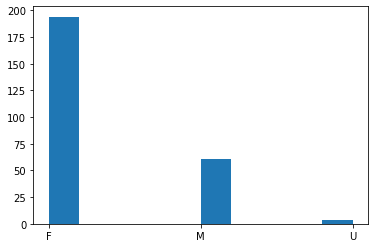

In [23]:
#Plotting the histogram for 'SEX' column of our dataset to gather info about male:female ratio
plt.hist(df['SEX'])

In [24]:
#Identifying the correlation between each column of our dataset
df.corr()

,VAERS_ID,AGE_YRS,CAGE_YR
VAERS_ID,1.000000,0.492961,0.415864
AGE_YRS,0.492961,1.000000,0.997673
CAGE_YR,0.415864,0.997673,1.000000


In [25]:
del df['AGE_YRS']

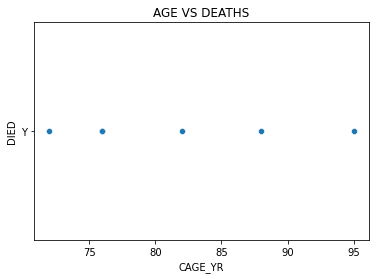

In [26]:
# Scatter plot between CAFE_YR and DIED
sns.scatterplot(x = 'CAGE_YR',y='DIED',data=df)
plt.title('AGE VS DEATHS')
plt.show()

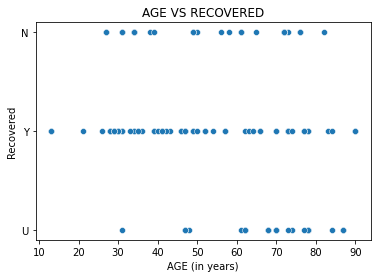

In [27]:
# Scatter plot between CAFE_YR and DIED
sns.scatterplot(x = 'CAGE_YR',y='RECOVD',data=df)
plt.xlabel('AGE (in years)')
plt.ylabel('Recovered')
plt.title('AGE VS RECOVERED')
plt.show()

In [28]:
#Converting the below Columns to the correct format
df['RECVDATE'] = pd.to_datetime(df['RECVDATE'])
df['VAX_DATE'] = pd.to_datetime(df['VAX_DATE'])

In [29]:
df.head()

,VAERS_ID,RECVDATE,STATE,CAGE_YR,SEX,DIED,L_THREAT,HOSPITAL,RECOVD,VAX_DATE,...,HISTORY,ALLERGIES,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE
0,916623,2021-01-01,LA,31.0,F,NaN,NaN,NaN,N,2020-12-31,...,Anxiety,Morphine,Injection site pain,NaN,NaN,NaN,NaN,1,IM,LA
6,917542,2021-01-02,LA,26.0,F,NaN,NaN,NaN,Y,2020-12-29,...,None,Sulfa,Chills,Fatigue,Hyperhidrosis,Hypoaesthesia,Paraesthesia,1,IM,LA
7,920665,2021-01-02,LA,NaN,F,NaN,NaN,NaN,NaN,NaT,...,none,none,Asthenia,Bradycardia,Carotid pulse abnormal,Cold sweat,Dysphagia,UNK,NaN,NaN
8,920665,2021-01-02,LA,NaN,F,NaN,NaN,NaN,NaN,NaT,...,none,none,Fatigue,Formication,Full blood count normal,Hyperhidrosis,Loss of consciousness,UNK,NaN,NaN
9,920665,2021-01-02,LA,NaN,F,NaN,NaN,NaN,NaN,NaT,...,none,none,Metabolic function test normal,Mydriasis,Radial pulse abnormal,Sensation of foreign body,Throat clearing,UNK,NaN,NaN


In [30]:
# df.to_csv('Final Dataset1.csv')

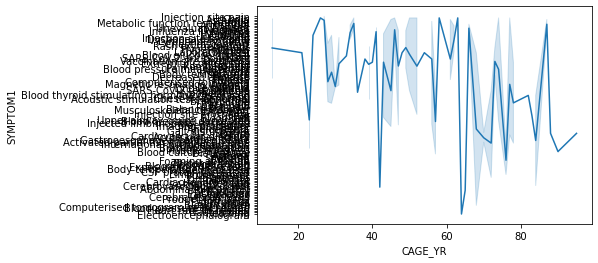

In [31]:
#Plotting LinePlot between CAGE_YR and SYMPTOM1
sns.lineplot(x='CAGE_YR',y='SYMPTOM1',data=df)

In [32]:
symp1 = list(df['SYMPTOM1'])
symp1.count('Fatigue')
symp1.count('Headache')
# symp1.value_counts()
df["SYMPTOM1"].value_counts()

Chills                        17
COVID-19                      15
Arthralgia                    10
Asthenia                      10
Headache                       7
                              ..
Cardiac failure acute          1
Balance disorder               1
Blood pressure measurement     1
SARS-CoV-2 test                1
Haematoma                      1
Name: SYMPTOM1, Length: 126, dtype: int64

In [33]:
df["SYMPTOM2"].value_counts()

Headache                     11
Fatigue                       9
Chills                        8
Nausea                        7
Dyspnoea                      6
                             ..
Bradycardia                   1
Metabolic function test       1
Lip swelling                  1
Brain natriuretic peptide     1
Rash pruritic                 1
Name: SYMPTOM2, Length: 124, dtype: int64

In [34]:
df["SYMPTOM3"].value_counts()

Headache                   10
Pain                        8
Fatigue                     7
Dizziness                   6
Pyrexia                     5
                           ..
Cortisol normal             1
Hallucination               1
Injection site bruising     1
Spinal osteoarthritis       1
Rash pruritic               1
Name: SYMPTOM3, Length: 109, dtype: int64

In [35]:
df["SYMPTOM4"].value_counts()

Pyrexia                     10
Headache                     6
Pain in extremity            5
Fatigue                      4
SARS-CoV-2 test negative     4
                            ..
Hypoaesthesia oral           1
Hypertension                 1
Frequent bowel movements     1
Anaemia                      1
Malaise                      1
Name: SYMPTOM4, Length: 85, dtype: int64

In [36]:
dict = df["SYMPTOM5"].value_counts()
dict2 = {}
# print(type(dict))
for i,j in dict.items():
#     print(i,j)
    if(j>1):
        dict2[i]=j
print(dict2)
print(type(dict2))

{'Headache': 7, 'Nausea': 4, 'Rash': 3, 'Dizziness': 3, 'Laboratory test': 3, 'Pain': 2, 'Vomiting': 2, 'Hypoaesthesia': 2, 'Peripheral swelling': 2, 'Throat clearing': 2, 'Periorbital swelling': 2, 'Facial paralysis': 2, 'Mental impairment': 2, 'Lymphadenopathy': 2, 'SARS-CoV-2 test positive': 2, 'Respiratory tract congestion': 2, 'Pyrexia': 2, 'Fatigue': 2, 'Chills': 2}
<class 'dict'>


In [37]:
#To find the most severe symptoms experienced by People
severe = dict2.keys()
print(len(severe))

19


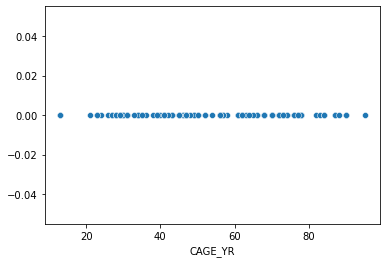

In [38]:
# Scatter Plot between CAFE_YR and SYMPTOMS
sns.scatterplot(x ='CAGE_YR' ,y ='SYMPTOMS'==severe,data=df)

(array([14.,  0.,  3.,  0.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. ]),
 <a list of 10 Patch objects>)

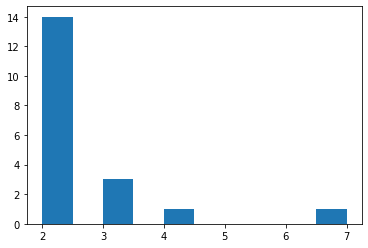

In [39]:
s = pd.Series(dict2)
plt.hist(s)

In [40]:
df.columns

Index(['VAERS_ID', 'RECVDATE', 'STATE', 'CAGE_YR', 'SEX', 'DIED', 'L_THREAT',
       'HOSPITAL', 'RECOVD', 'VAX_DATE', 'OTHER_MEDS', 'CUR_ILL', 'HISTORY',
       'ALLERGIES', 'SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5',
       'VAX_DOSE_SERIES', 'VAX_ROUTE', 'VAX_SITE'],
      dtype='object')

In [41]:
#print(df['SYMPTOM1'].max())
#print(df['SYMPTOM2'].max())
#print(df['SYMPTOM3'].max())
#print(df['SYMPTOM4'].max())
#df['SYMPTOM5'].max()

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 259 entries, 0 to 500
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   VAERS_ID         259 non-null    int64         
 1   RECVDATE         259 non-null    datetime64[ns]
 2   STATE            259 non-null    object        
 3   CAGE_YR          138 non-null    float64       
 4   SEX              259 non-null    object        
 5   DIED             8 non-null      object        
 6   L_THREAT         7 non-null      object        
 7   HOSPITAL         52 non-null     object        
 8   RECOVD           234 non-null    object        
 9   VAX_DATE         238 non-null    datetime64[ns]
 10  OTHER_MEDS       133 non-null    object        
 11  CUR_ILL          99 non-null     object        
 12  HISTORY          188 non-null    object        
 13  ALLERGIES        123 non-null    object        
 14  SYMPTOM1         259 non-null    object   

In [44]:
#Dropping the null rows from our dataset
d1 = df[['CAGE_YR', 'SYMPTOM1']]
d1.dropna(inplace=True)

<ipython-input-44-158ad00b0b1b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1.dropna(inplace=True)


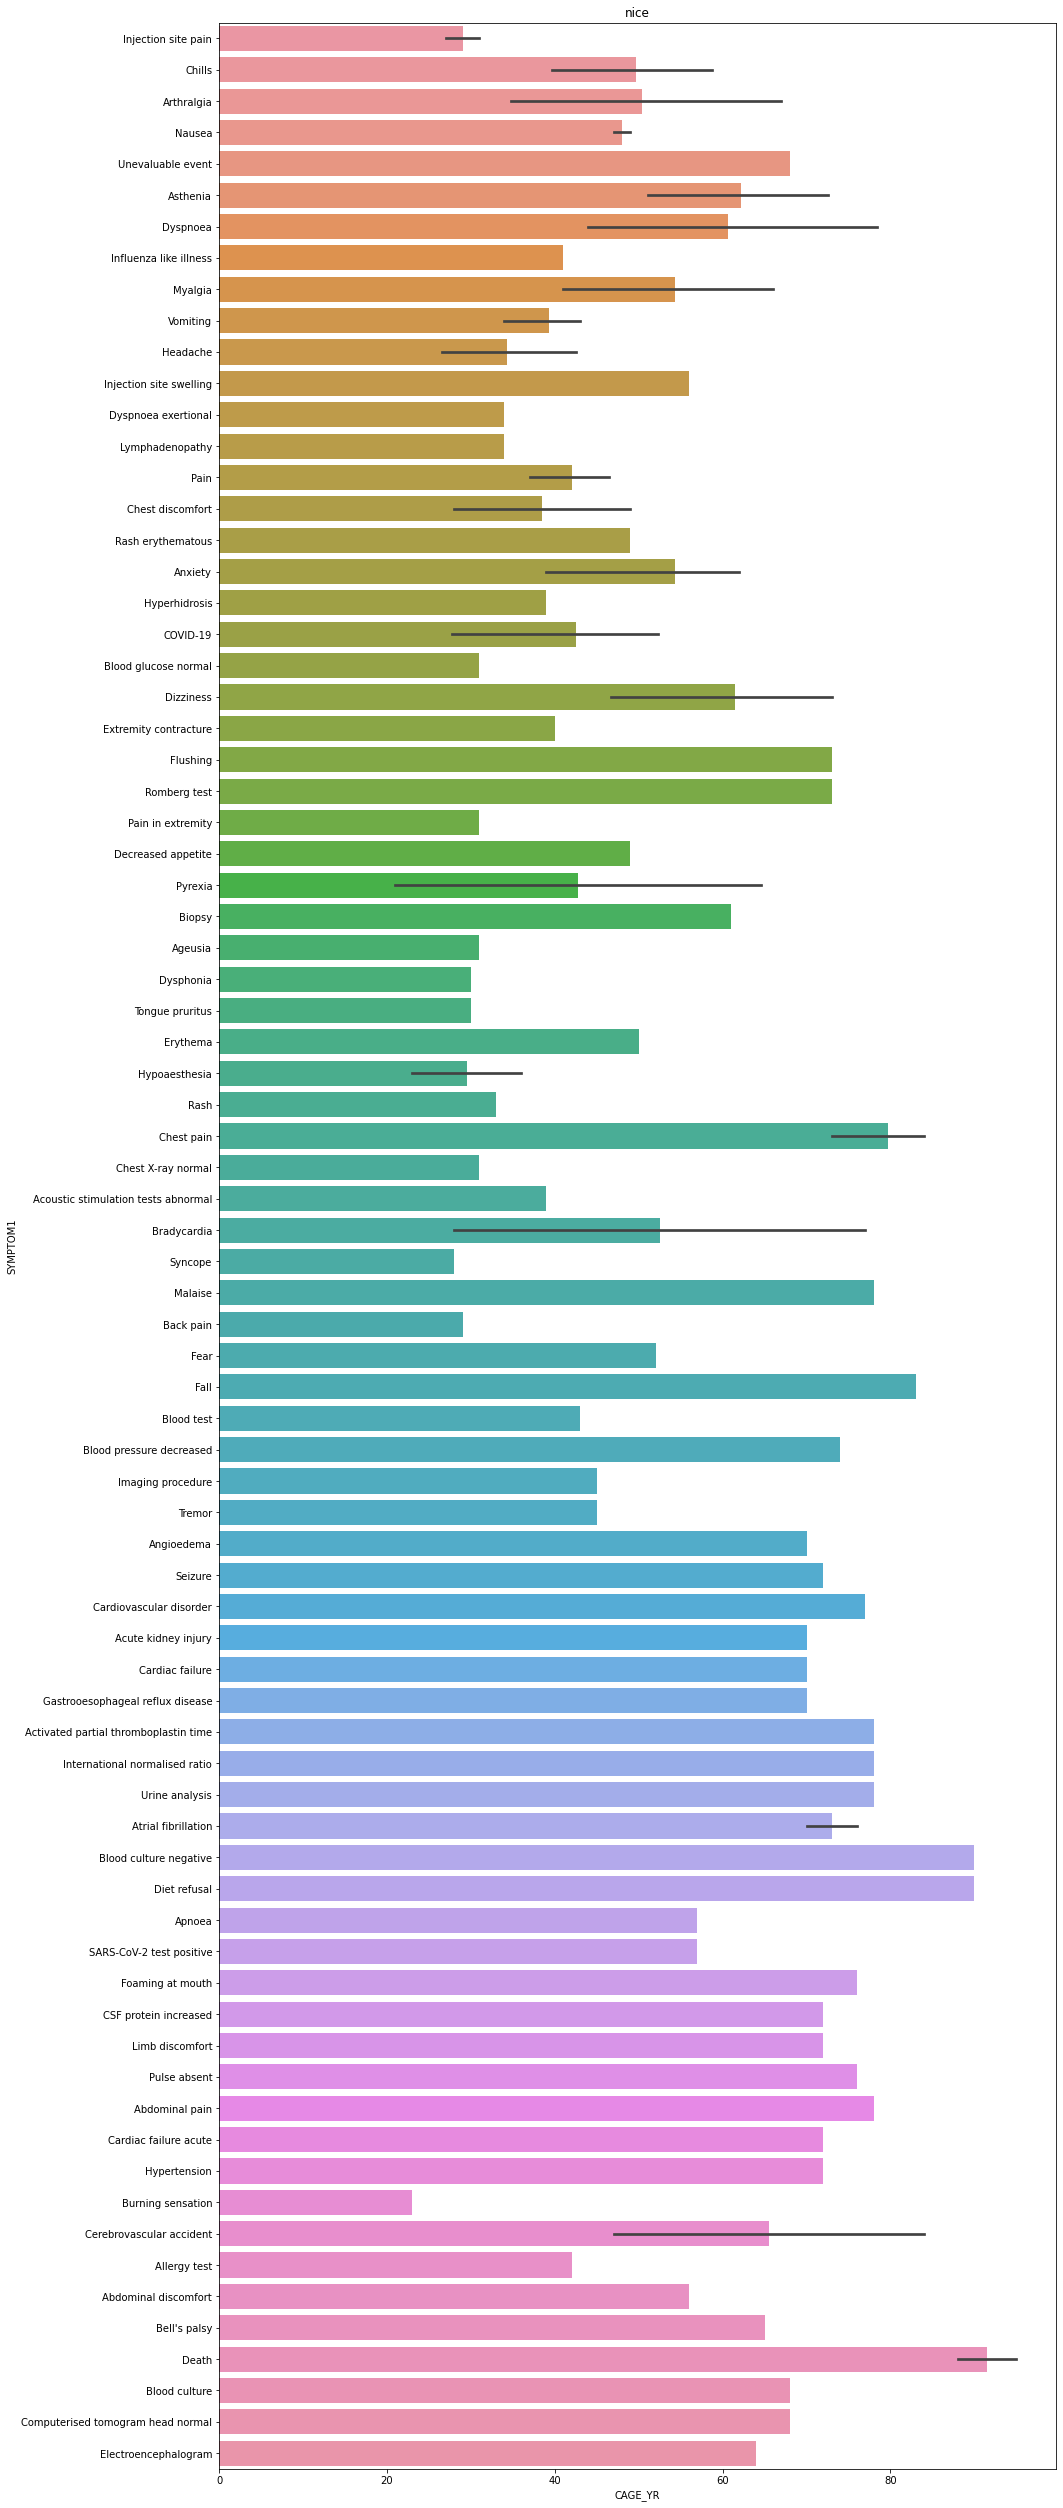

In [45]:
#Plotting the BarPlot between CAGE_YR and SYMPTOM1
fig, ax = plt.subplots(figsize=(15,45))
sns.barplot(x='CAGE_YR',y='SYMPTOM1',data=d1).set_title('nice')
#plt.xticks(45)
plt.show()